In [263]:
!pip install xgboost

In [120]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
print("Imported")

Imported


In [92]:
warnings.filterwarnings("ignore")
pd.set_option("display.width", 0)
pd.set_option("display.max_rows", 200)
sns.set_theme()

In [93]:
data = pd.read_csv("https://raw.githubusercontent.com/Dineshkumar-Anbalagan/Kaggle_Notebooks/main/kaggle%20datasets/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1414 non-null   int64  
 1   MSZoning       1414 non-null   object 
 2   LotFrontage    1414 non-null   float64
 3   LotArea        1414 non-null   int64  
 4   Street         1414 non-null   object 
 5   LotShape       1414 non-null   object 
 6   LandContour    1414 non-null   object 
 7   Utilities      1414 non-null   object 
 8   LotConfig      1414 non-null   object 
 9   LandSlope      1414 non-null   object 
 10  Neighborhood   1414 non-null   object 
 11  Condition1     1414 non-null   object 
 12  Condition2     1414 non-null   object 
 13  BldgType       1414 non-null   object 
 14  HouseStyle     1414 non-null   object 
 15  OverallQual    1414 non-null   int64  
 16  OverallCond    1414 non-null   int64  
 17  YearBuilt      1414 non-null   int64  
 18  YearRemo

In [95]:
data.drop(columns = ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis = 1, inplace = True)
data.set_index("Id",inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:ylabel='Id'>

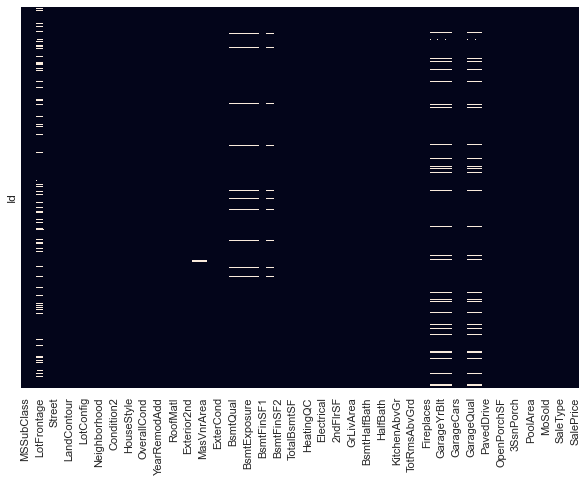

In [96]:
plt.figure(figsize = (10,7))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False)

In [97]:
# -- null records handling :

# -- lot frontage:
data["LotFrontage"].fillna(data["LotFrontage"].mean(), inplace=True)

# -- garage based columns:
gar_col = ["GarageCond","GarageQual","GarageType","GarageFinish"]

for i in gar_col:
    data[i].fillna("NA", inplace=True)
    
data["GarageYrBlt"].fillna(2005.0, inplace=True)

# -- basement based columns:
bsmt_col = ["BsmtQual","BsmtQual","BsmtFinType1","BsmtExposure","BsmtFinType2"]

for i in bsmt_col:
    data[i].fillna("NA", inplace=True)

# -- dropping others columns:
data.dropna(inplace = True)

In [99]:
data.duplicated(keep = False).sum() # -- duplicates

0

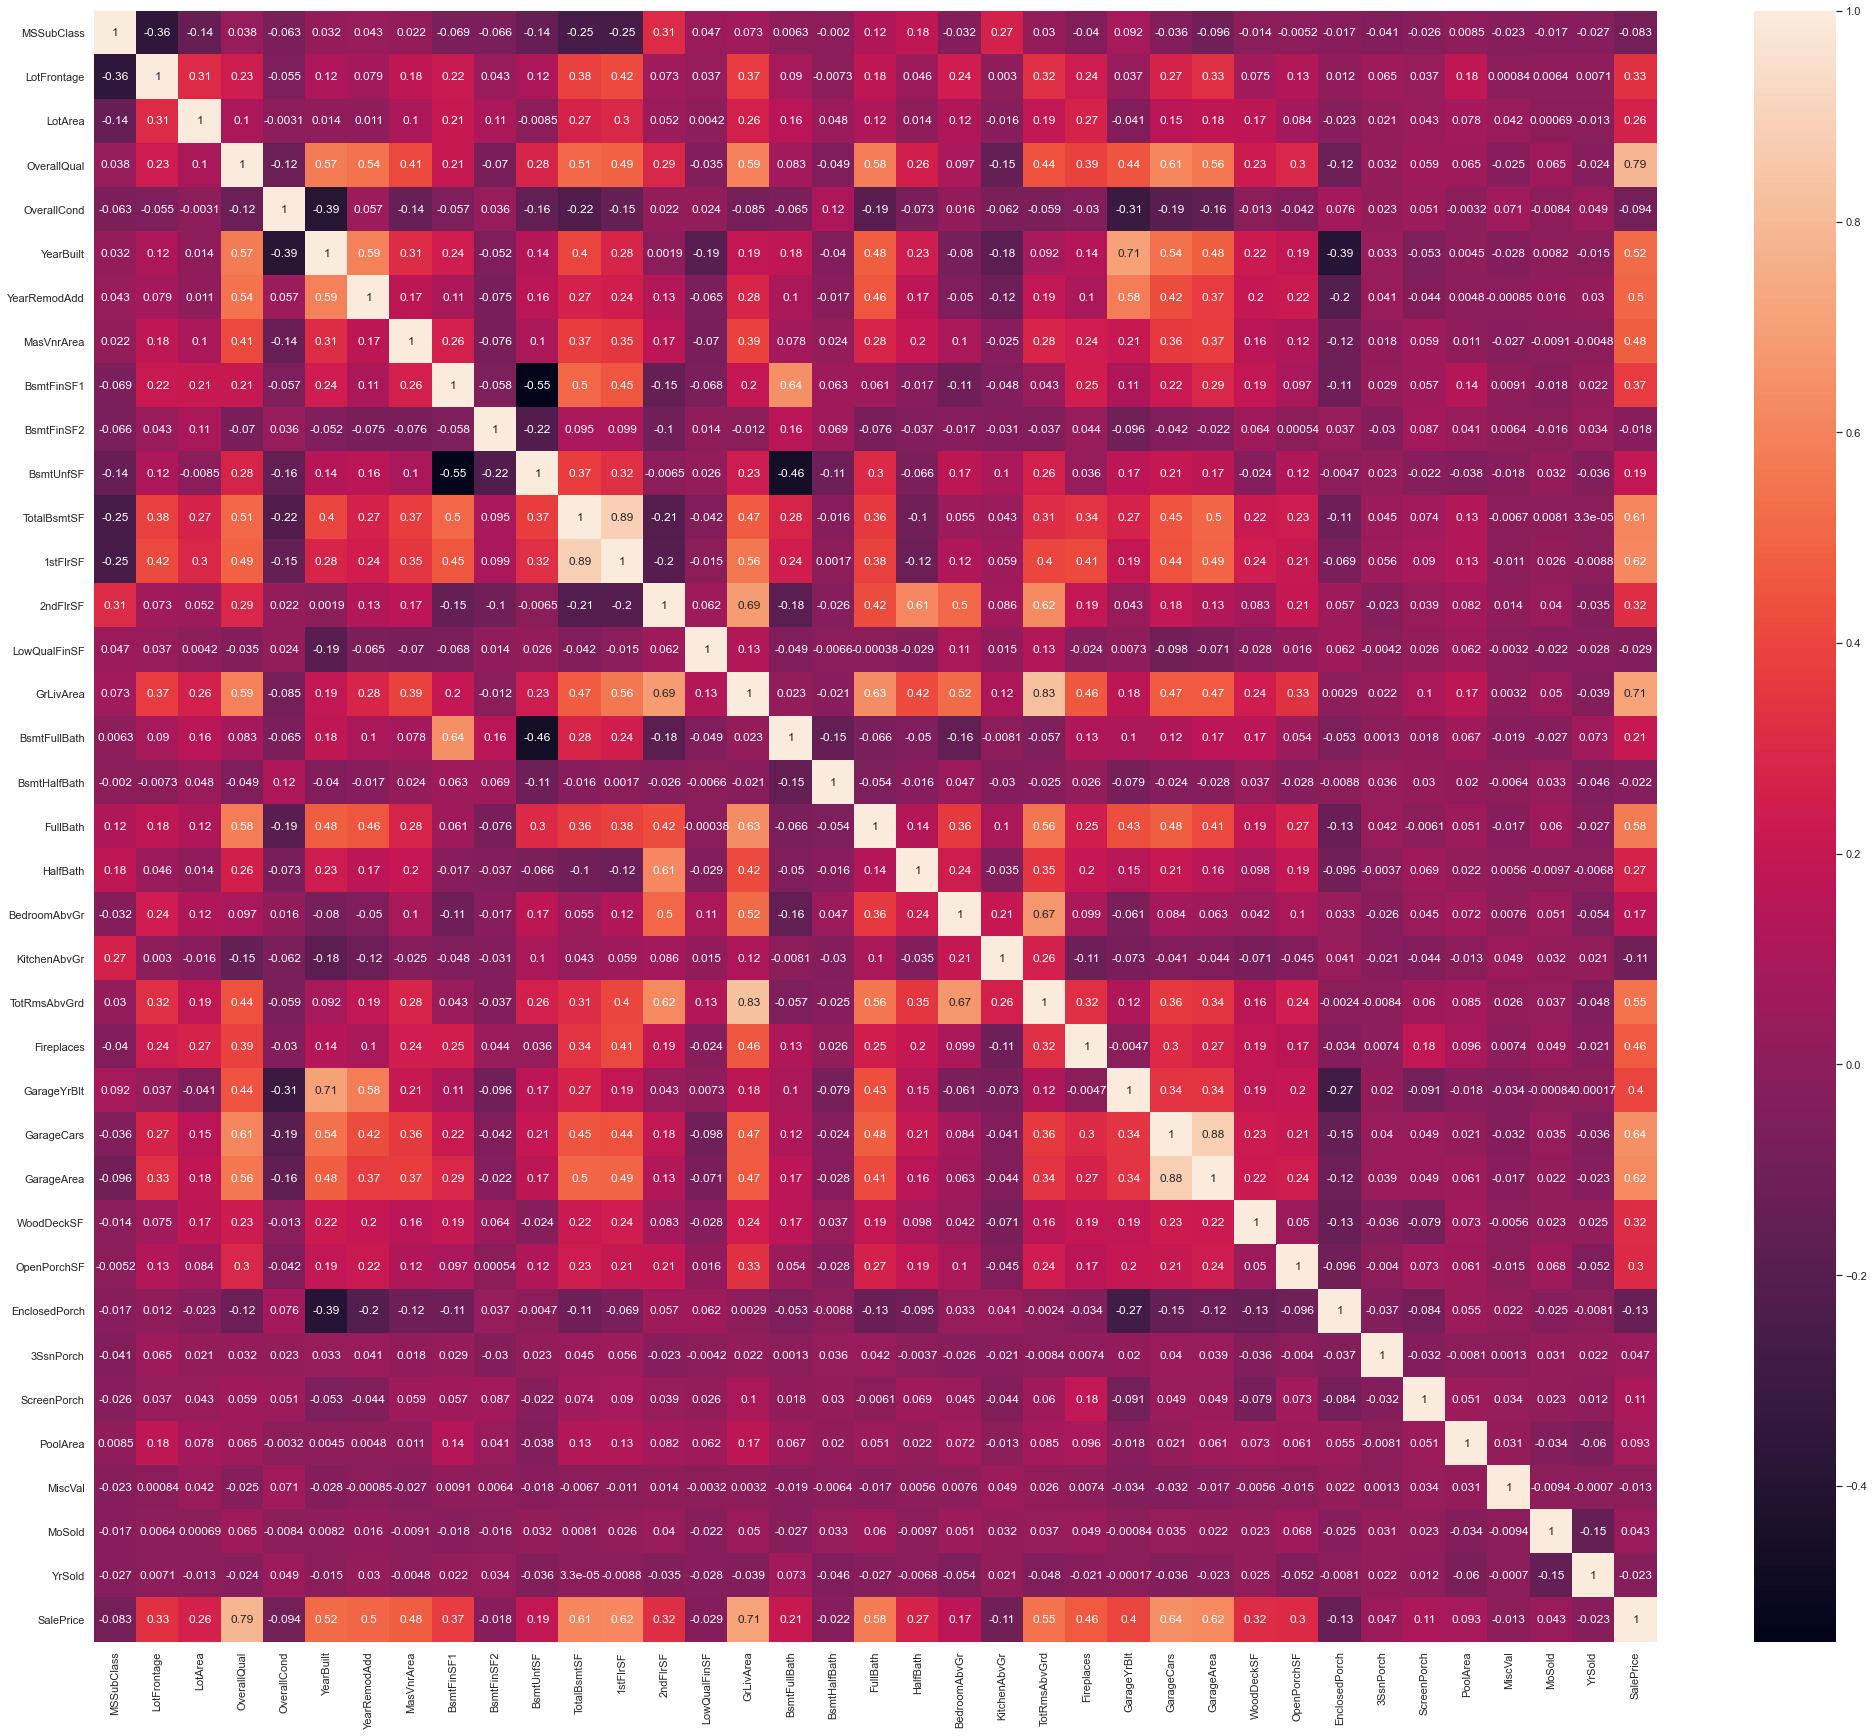

In [100]:
plt.figure(figsize = (35,30))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [101]:
data.corr()["SalePrice"].sort_values(ascending = False)[1:10]

OverallQual     0.786967
GrLivArea       0.710824
GarageCars      0.642331
GarageArea      0.621658
1stFlrSF        0.615043
TotalBsmtSF     0.609508
FullBath        0.575801
TotRmsAbvGrd    0.545481
YearBuilt       0.519079
Name: SalePrice, dtype: float64

<Figure size 432x288 with 0 Axes>

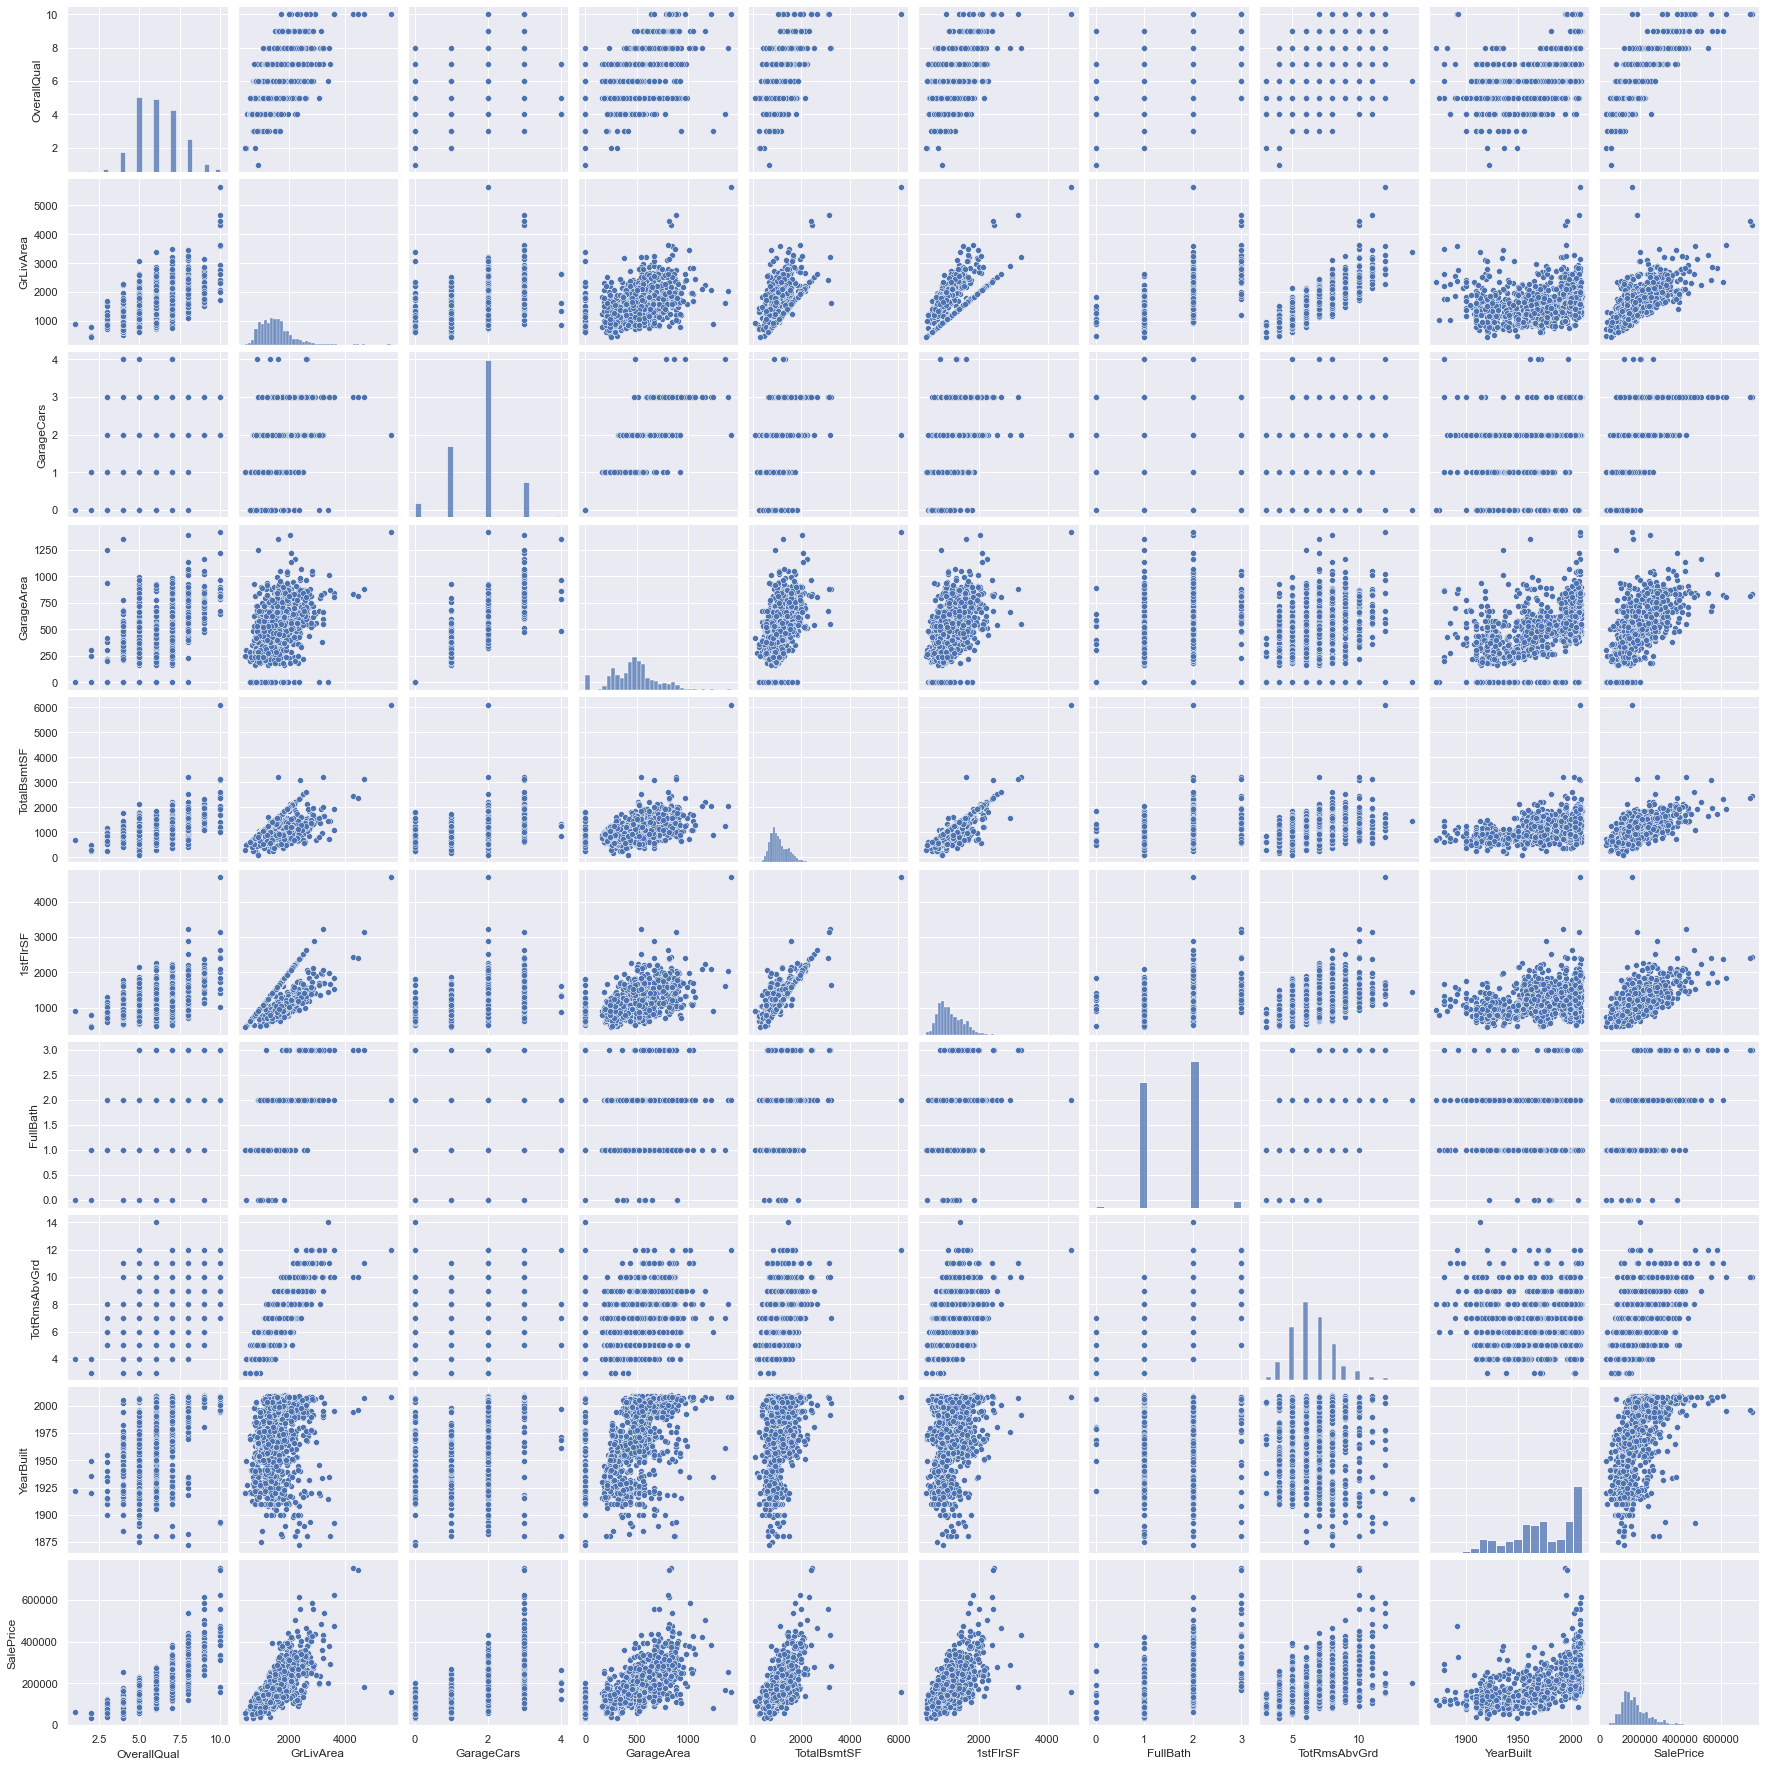

In [102]:
data1 = data[["OverallQual","GrLivArea","GarageCars",
              "GarageArea","TotalBsmtSF","1stFlrSF",
              "FullBath","TotRmsAbvGrd","YearBuilt",
              "SalePrice"]]

plt.figure()
sns.pairplot(data1)
plt.show()

In [103]:
data2 = pd.get_dummies(data=data, columns=data.select_dtypes(np.object).columns)
data2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [104]:
data2.corr()["SalePrice"].sort_values()[:10]

ExterQual_TA        -0.588056
KitchenQual_TA      -0.520994
BsmtQual_TA         -0.486602
GarageFinish_Unf    -0.409769
MasVnrType_None     -0.365641
Foundation_CBlock   -0.360652
GarageType_Detchd   -0.351979
HeatingQC_TA        -0.313703
BsmtExposure_No     -0.308473
MSZoning_RM         -0.295899
Name: SalePrice, dtype: float64

In [105]:
data2.corr()["SalePrice"].sort_values()[-15:]

MasVnrArea          0.475022
Foundation_PConc    0.492114
YearRemodAdd        0.500610
KitchenQual_Ex      0.500715
YearBuilt           0.519079
TotRmsAbvGrd        0.545481
BsmtQual_Ex         0.550785
FullBath            0.575801
TotalBsmtSF         0.609508
1stFlrSF            0.615043
GarageArea          0.621658
GarageCars          0.642331
GrLivArea           0.710824
OverallQual         0.786967
SalePrice           1.000000
Name: SalePrice, dtype: float64

## LINEAR REGRESSION

In [151]:
data4 = data2[["ExterQual_TA","KitchenQual_TA","BsmtQual_TA","GarageFinish_Unf",
               "MasVnrType_None","Foundation_CBlock","GarageType_Detchd","HeatingQC_TA",
               "BsmtExposure_No","MSZoning_RM","MasVnrArea","Foundation_PConc",
               "YearRemodAdd","KitchenQual_Ex","YearBuilt","TotRmsAbvGrd","BsmtQual_Ex",
               "FullBath","TotalBsmtSF","1stFlrSF","GarageArea","GarageCars","GrLivArea",
               "OverallQual","SalePrice"]]

x = data4.drop("SalePrice", axis = 1)
y = data4["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
linear = LinearRegression().fit(x_train, y_train)
predicted = linear.predict(x_test)
mean_squared_error(y_test, predicted)

1192258383.9129455

In [152]:
r2_score(y_test, predicted)

0.8271103892158851

## XGBOOST REGRESSOR

In [36]:
#conda install -c conda-forge xgboost

In [112]:
from xgboost import XGBRegressor

In [113]:
x = data4.drop("SalePrice", axis = 1)
y = data4["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
linear = XGBRegressor().fit(x_train, y_train)
predicted = linear.predict(x_test)
mean_squared_error(y_test, predicted)

1604630282.7005181

In [114]:
r2_score(y_test, predicted)

0.7673122632042205

## RANDOM FOREST REGRESSOR

In [156]:
linear = RandomForestRegressor().fit(x_train, y_train)
predicted = linear.predict(x_test)
mean_squared_error(y_test, predicted)

1351027807.767581

In [157]:
r2_score(y_test, predicted)

0.8040872054286949

## FINAL TEST DATA

In [145]:
test_data = pd.read_csv("https://raw.githubusercontent.com/Dineshkumar-Anbalagan/Kaggle_Notebooks/main/kaggle%20datasets/house-prices-advanced-regression-techniques/test.csv").set_index("Id")
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
test_data["MasVnrArea"].fillna(test_data["MasVnrArea"].mean(), inplace = True)
test_data["TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].median(), inplace = True)
test_data["GarageArea"].fillna(test_data["GarageArea"].mean(), inplace = True)
test_data["GarageCars"].fillna(test_data["GarageCars"].mean(), inplace = True)

In [147]:
test_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [148]:
data5 = pd.get_dummies(data = test_data, columns = test_data.select_dtypes(np.object).columns)

In [158]:
test = data5[["ExterQual_TA","KitchenQual_TA","BsmtQual_TA","GarageFinish_Unf",
               "MasVnrType_None","Foundation_CBlock","GarageType_Detchd","HeatingQC_TA",
               "BsmtExposure_No","MSZoning_RM","MasVnrArea","Foundation_PConc",
               "YearRemodAdd","KitchenQual_Ex","YearBuilt","TotRmsAbvGrd","BsmtQual_Ex",
               "FullBath","TotalBsmtSF","1stFlrSF","GarageArea","GarageCars","GrLivArea",
               "OverallQual"]]
predicted = linear.predict(test)

In [159]:
output = pd.DataFrame({"Id":test_data.index,"SalePrice":predicted})

In [160]:
output.to_csv("submission_random.csv", index = False)

In [211]:
sum(((1,2,3,4)))

10

In [214]:
import statsmodels.api as sm
model2 =sm.OLS(y_train,x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1284.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        18:13:31   Log-Likelihood:                         -11738.
No. Observations:                 989   AIC:                                  2.352e+04
Df Residuals:                     965   BIC:                                  2.364e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ExterQual_TA      -9844.3493   3773.975     -2.608      0.009   -1.73e+04   -2438.206
KitchenQual_TA    -8459.5322   3350.179     -2.525      0.012    -1.5e+04   -1885.057
BsmtQual_TA       -3754.1670   3373.906     -1.113      0.266   -1.04e+04    2866.872
GarageFinish_Unf  -2623.3831   3212.739     -0.817      0.414   -8928.144    3681.377
MasVnrType_None    7863.0284   3392.144      2.318      0.021    1206.199    1.45e+04
Foundation_CBlock  8374.0805   4691.453      1.785      0.075    -832.545    1.76e+04
GarageType_Detchd -6911.6004   3547.761     -1.948      0.052   -1.39e+04      50.616
HeatingQC_TA      -3045.6885   2948.727     -1.033      0.302   -8832.345    2740.968
BsmtExposure_No   -1.318e+04   2607.932     -5.055      0.000   -1.83e+04   -8065.820
MSZoning_RM       -1.474e+04   3639.068     -4.049      0.000   -2.19e+04   -7594.050
MasVnrArea           31.5074      9.360      3.366      0.001      13.138      49.876
Foundation_PConc   6938.7476   5244.511      1.323      0.186   -3353.213    1.72e+04
YearRemodAdd         71.7472     63.200      1.135      0.257     -52.278     195.773
KitchenQual_Ex     3.289e+04   5383.535      6.110      0.000    2.23e+04    4.35e+04
YearBuilt           -81.4980     64.302     -1.267      0.205    -207.685      44.689
TotRmsAbvGrd       4427.2158   1331.713      3.324      0.001    1813.828    7040.604
BsmtQual_Ex        3.064e+04   5374.396      5.701      0.000    2.01e+04    4.12e+04
FullBath           -272.8928   3212.408     -0.085      0.932   -6577.003    6031.218
TotalBsmtSF           4.2169      6.493      0.649      0.516      -8.526      16.960
1stFlrSF             11.1892      7.262      1.541      0.124      -3.061      25.439
GarageArea            2.8023     11.473      0.244      0.807     -19.712      25.317
GarageCars         1.622e+04   3540.321      4.583      0.000    9276.214    2.32e+04
GrLivArea            25.5699      5.000      5.114      0.000      15.757      35.382
OverallQual         1.51e+04   1519.755      9.937      0.000    1.21e+04    1.81e+04
==============================================================================
Omnibus:                      416.537   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24906.779
Skew:                          -1.097   Prob(JB):                         0.00
Kurtosis:                      27.487   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly spec